In [1]:
from utils import load_input_image, rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import cv2 
import skimage


In [2]:
imgs = {i: load_input_image(i) for i in range(15)}

In [3]:
# _,axes = plt.subplots(3,5, figsize=(10,5))
# for i,ax in enumerate(axes.ravel()):    
#     ax.imshow(imgs[i])
#     ax.axis("off")
# plt.tight_layout()

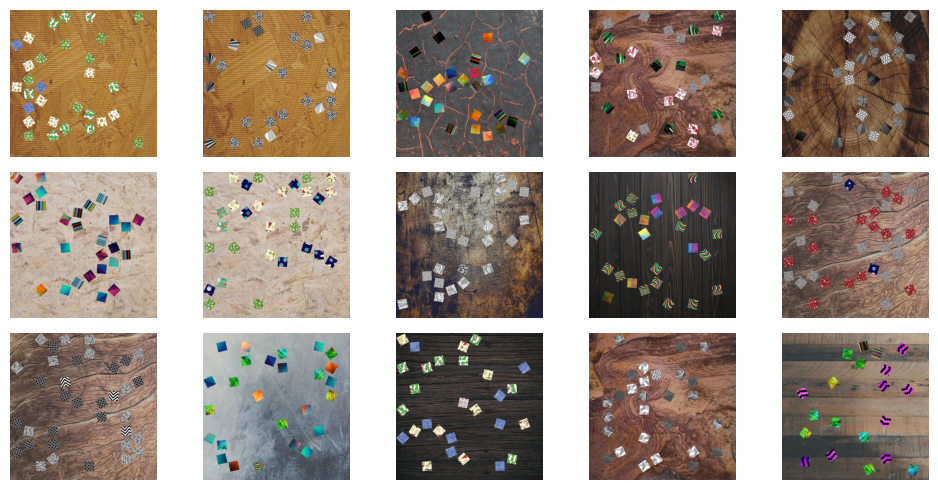

In [4]:
from skimage.color import rgb2hsv

In [5]:
plt.rcParams['image.cmap'] = 'gray'

**Hue**

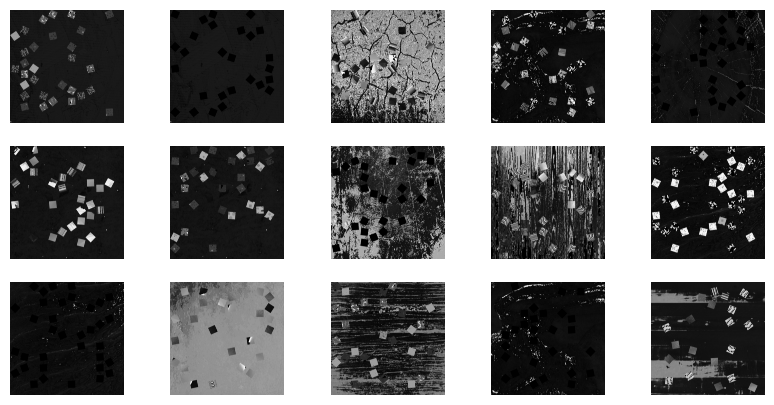

In [6]:
# fig, axs = plt.subplots(3, 5, figsize=(10, 5))
# for ax, img in zip(axs.ravel(), imgs.values()):
#     img_hsv = rgb2hsv(img)
#     ax.imshow(img_hsv[:,:,0])
#     ax.axis("off")

**Value**

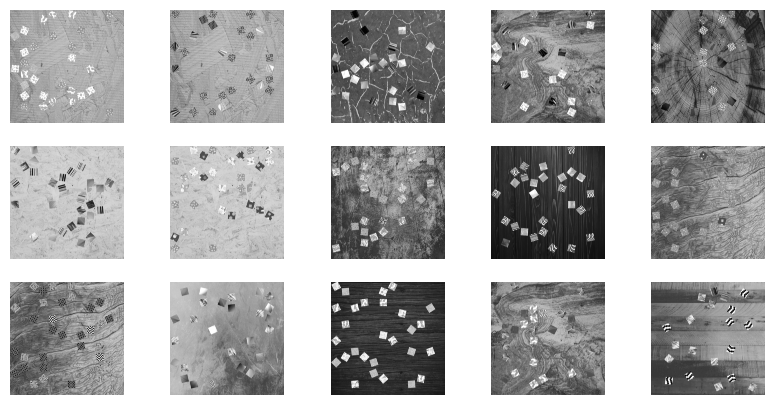

In [7]:
# from skimage.color import rgb2hsv

# fig, axs = plt.subplots(3, 5, figsize=(10, 5))
# for ax, img in zip(axs.ravel(), imgs.values()):
#     img_hsv = rgb2hsv(img)
#     ax.imshow(img_hsv[:,:,2])
#     ax.axis("off")

**Saturation**

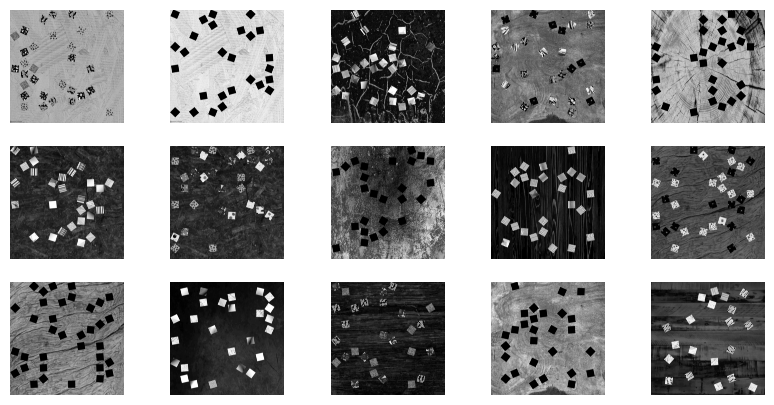

In [8]:
# fig, axs = plt.subplots(3, 5, figsize=(10, 5))
# for ax, img in zip(axs.ravel(), imgs.values()):
#     img_hsv = rgb2hsv(img)
#     ax.imshow(img_hsv[:,:,1])
#     ax.axis("off")

In [9]:
imgs_sat = {i: rgb2hsv(imgs[i])[:,:,1] for i in range(15)}

Sigma=3 in filter
Sigma = 3 in canny 

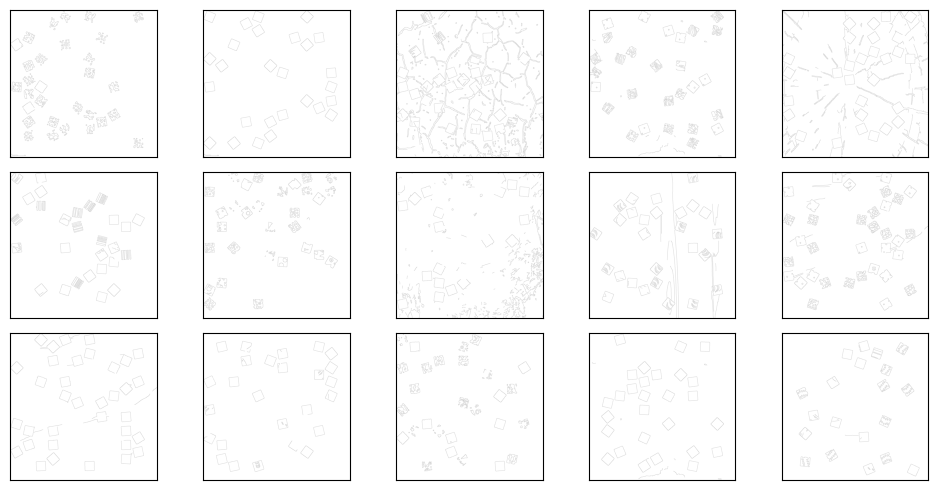

Sigma=2 in filter

Sigma = 4 in canny 

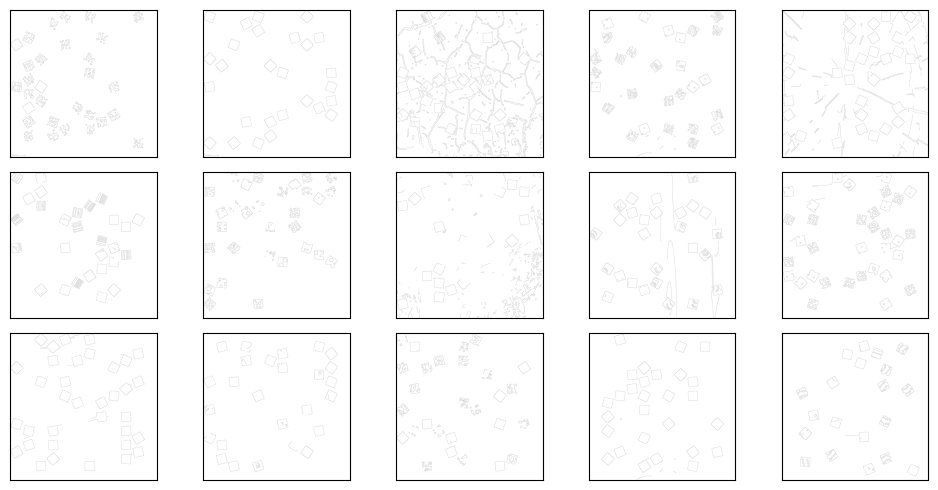

Sigma= 3 in filter

Sigma = 1 in canny 

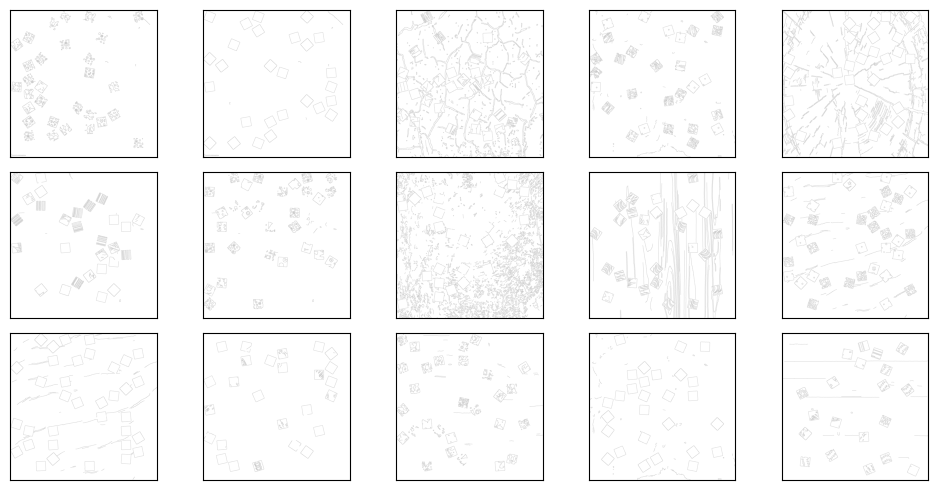

Sigma= 3 in filter

Sigma = 2 in canny 

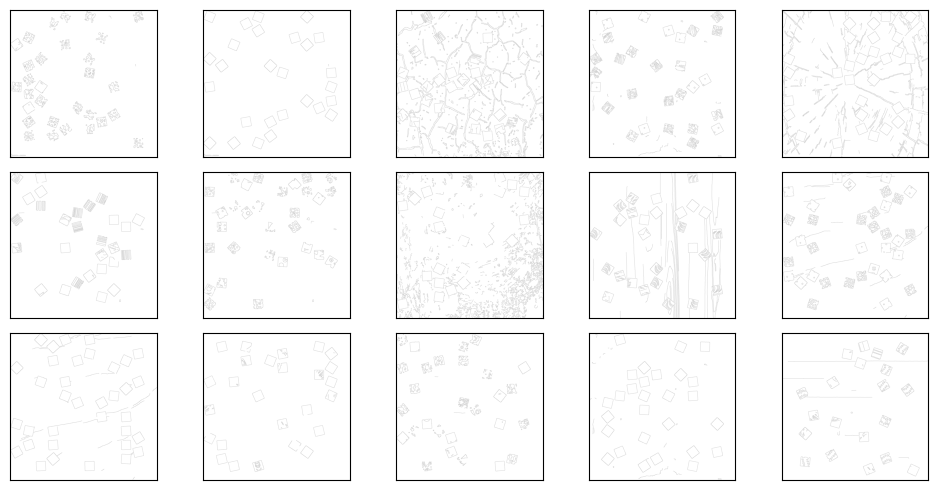

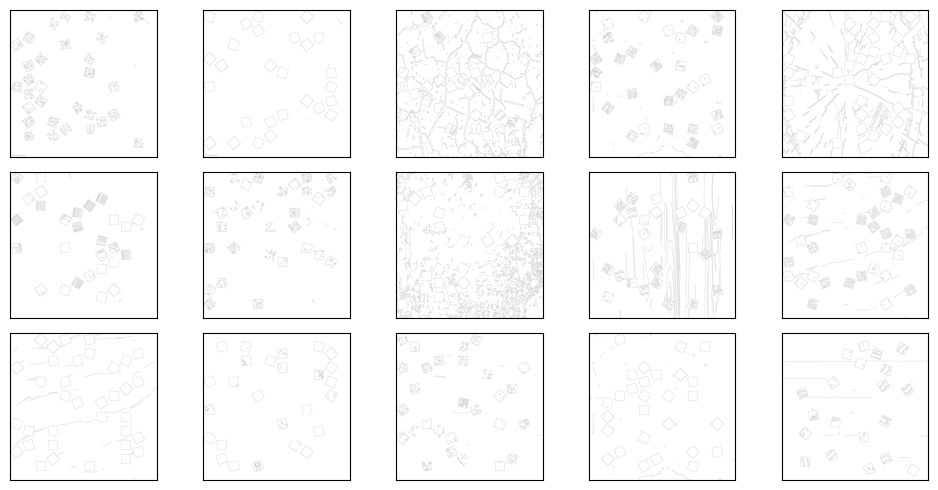

In [10]:
from skimage.feature import canny

imgs_canny = {}

fig, axs = plt.subplots(3, 5, figsize=(10, 5))
for i, (ax, img) in enumerate(zip(axs.ravel(), imgs_sat.values())):
    igm_filter = skimage.filters.gaussian(img, sigma=3)
    edges = canny(igm_filter, sigma=1.5)
    imgs_canny[i] = edges
    ax.imshow(~edges, cmap="gray")
    ax.axis("image")
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

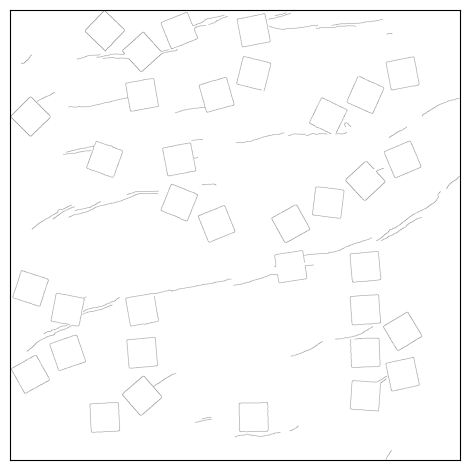

In [43]:
n=10

img = imgs[n]
img_canny = imgs_canny[n]

_,ax= plt.subplots()
ax.imshow(~img_canny, cmap="gray")
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()


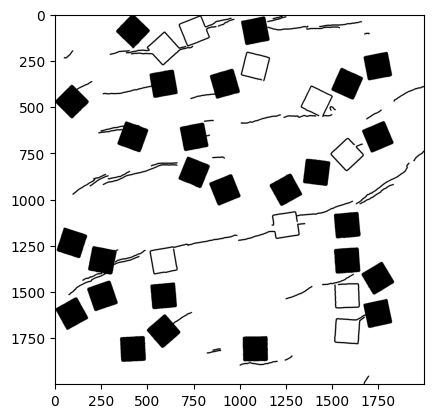

In [44]:
dil = skimage.morphology.remove_small_holes(img_canny, 128**2)
dil = skimage.morphology.dilation(dil, footprint=skimage.morphology.disk(3))
dil = skimage.morphology.remove_small_holes(dil, 128**2)

plt.imshow(~dil)


plt.show()

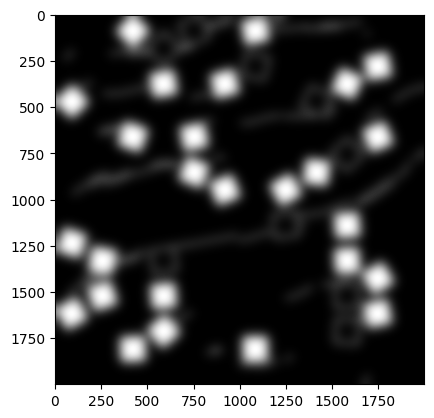

In [45]:
dil_blur = ndi.gaussian_filter(dil.astype('float32'), sigma=30)
plt.imshow(dil_blur)
plt.show()

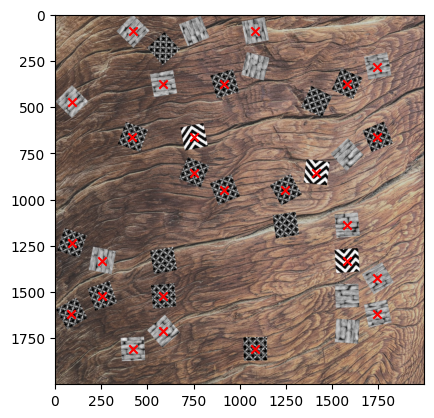

In [46]:
centered = dil_blur[1:-1, 1:-1]
right = dil_blur[1:-1, 2:]
left = dil_blur[1:-1, :-2]
top = dil_blur[:-2, 1:-1]
bottom = dil_blur[2:, 1:-1]

img_peaks = (
    (centered > right)
    & (centered > left)
    & (centered > bottom)
    & (centered > top)
    & (centered > 0.5)
)

indx = np.where(img_peaks == 1)
plt.imshow(img, cmap="gray")
plt.scatter(np.abs(indx[1]), np.abs(-indx[0]), marker="x", color="red")

In [47]:
seeds = np.transpose(np.vstack((indx[0],indx[1])))
len(seeds)

26

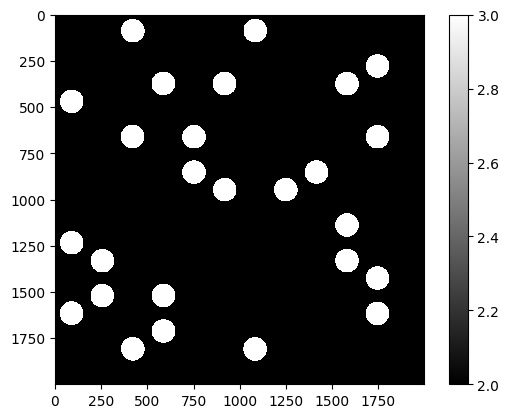

In [48]:
shape = (2000,2000)
mask_bkg = 2 * np.ones(shape)
mask_frg = np.zeros(shape)
mask_frg[seeds[:, 0], seeds[:, 1]] = 1

indices = np.indices(img.shape[:2])
for seed in seeds:
    mask_frg[np.sqrt((indices[0]-seed[0])**2+(indices[1]-seed[1])**2)<128//2]=1
    
mask = (mask_frg+mask_bkg).astype("uint8")

plt.imshow(mask, interpolation="nearest")
plt.colorbar()

In [49]:
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

cv2.grabCut(img, mask, rect= None, 
			bgdModel= backgroundModel, fgdModel= foregroundModel,
			iterCount= 5,  mode= cv2.GC_INIT_WITH_MASK)

(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[3.01617773e-01, 2.78901967e-01, 3.39499660e-01, 7.86942827e-02,
         1.28631640e-03, 9.66813670e+01, 7.54554080e+01, 6.65315113e+01,
         1.75968154e+02, 1.45749775e+02, 1.25677522e+02, 1.35228864e+02,
         1.08131802e+02, 9.57568085e+01, 7.00030798e+01, 5.83600981e+01,
         5.47136519e+01, 8.12881701e+01, 8.12881701e+01, 7.90013572e+01,
         1.66483776e+02, 1.27193287e+02, 1.12407748e+02, 1.27193287e+02,
         1.10004885e+02, 1.01386328e+02, 1.12407748e+02, 1.01386328e+02,
         1.04457281e+02, 2.01534623e+02, 1.95884183e+02, 1.45458662e+02,
         1.95884183e+02, 2.61019534e+02, 2.23092358e+02, 1.45458662e+02,
         2.23092358e+02, 2.30546230e+02, 1.63383032e+02, 1.08144847e+02,
         8.08621243e+01, 1.08144847e+02, 1.0

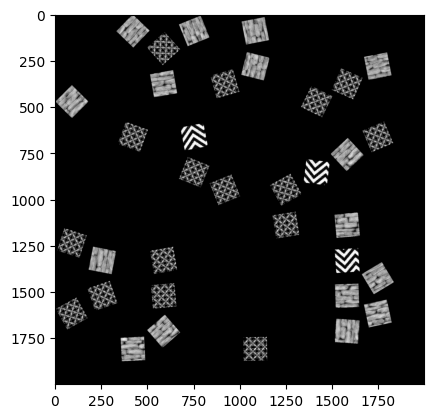

In [52]:
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

image_foreground = img * mask2[:,:,np.newaxis]

# output segmented image with colorbar
plt.imshow(image_foreground)
plt.show()